# Home Runs vs. Hits (per year) Analysis

In this report, we will be analyzing the relationship between home runs (HR) and hits (H) in Major League Baseball from 1970 to 2014. We will use a scatter plot to visualize the relationship and perform linear regression to quantify it.

The scatter plot of HR vs. H shows a positive relationship between the two variables; showing a r-value for the relationship between HR and H is 0.977. 

Based on the scatter plot and regression analysis, we can conclude that there is a strong positive relationship between home runs and hits in Major League Baseball from 1970 to 2014. This means that as the number of hits increases, the number of home runs is also expected to increase. The regression line provides us with a way to quantify this relationship and make predictions about the number of home runs based on the number of hits. The equation of the regression line is HR = 0.22 * H + (-21087.37), which tells us that for every one unit increase in H, HR is expected to increase by 0.22. The constant term (-21087.37) in the equation represents the expected value of HR when H = 0. Overall, these results suggest that hits play an important role in determining the number of home runs in Major League Baseball.

In [5]:
import pandas as pd
import os
import csv
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.linear_model import LinearRegression


In [6]:
csv_file = 'Baseball_Statistics.csv'

baseball_stats_df = pd.read_csv(csv_file)

baseball_stats_df

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,addybo01,1871,1,RC1,NaN,25,118.0,30.0,32.0,6.0,...,13.0,8.0,1.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN
2,allisar01,1871,1,CL1,NaN,29,137.0,28.0,40.0,4.0,...,19.0,3.0,1.0,2.0,5.0,NaN,NaN,NaN,NaN,NaN
3,allisdo01,1871,1,WS3,NaN,27,133.0,28.0,44.0,10.0,...,27.0,1.0,1.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN
4,ansonca01,1871,1,RC1,NaN,25,120.0,29.0,39.0,11.0,...,16.0,6.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101327,zitoba01,2015,1,OAK,AL,3,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101328,zobribe01,2015,1,OAK,AL,67,235.0,39.0,63.0,20.0,...,33.0,1.0,1.0,33.0,26.0,2.0,0.0,0.0,3.0,5.0
101329,zobribe01,2015,2,KCA,AL,59,232.0,37.0,66.0,16.0,...,23.0,2.0,3.0,29.0,30.0,1.0,1.0,0.0,2.0,3.0
101330,zuninmi01,2015,1,SEA,AL,112,350.0,28.0,61.0,11.0,...,28.0,0.0,1.0,21.0,132.0,0.0,5.0,8.0,2.0,6.0


In [56]:
#Removed any na data
revised_df = baseball_stats_df[['yearID','R', 'H', 'AB', 'HR']].dropna(how='any')

#Removed any data prior to 1970
revised_df = revised_df.loc[revised_df['yearID']> 1969]

#Removed all ABs less than 100
revised_df = revised_df.loc[revised_df['AB'] > 100]

revised_df.count()

yearID    18123
R         18123
H         18123
AB        18123
HR        18123
dtype: int64

In [57]:
#Binning Years
bins = [1969, 1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015]
labels = ['1970-1974', '1975-1979', '1980-1984', '1985-1989', '1990-1994', '1995-1999', '2000-2004', '2005-2009', '2010-2014']
year_bins = pd.cut(revised_df['yearID'], bins=bins, labels=labels, right=False)

revised_df['year_bins'] = year_bins



In [58]:
#Bin data
hits_grouped = revised_df.groupby('year_bins').sum()['H']
ab_grouped = revised_df.groupby('year_bins').sum()['R']
hr_grouped = revised_df.groupby('year_bins').sum()['HR']

year_grouped = pd.DataFrame({
    'Hits': hits_grouped,
    'Runs': ab_grouped,
    'Home Runs': hr_grouped
})

year_grouped

,Hits,Runs,Home Runs
year_bins,,,
1970-1974,151244.0,71989.0,13892.0
1975-1979,168221.0,81018.0,14418.0
1980-1984,162295.0,77701.0,14145.0
1985-1989,172856.0,86043.0,17460.0
1990-1994,168896.0,84346.0,16336.0
1995-1999,196915.0,105016.0,23256.0
2000-2004,207069.0,109932.0,25795.0
2005-2009,208159.0,107708.0,24338.0
2010-2014,196993.0,96764.0,21934.0


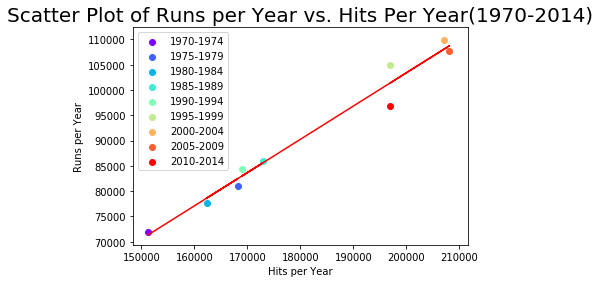

Slope of the regression line: 0.657
Slope: Runs = 0.66*hits + -28095.13
R-Value - Correlation: 0.986


/Users/jacqlyn/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [55]:
#scatter plot for grouped data
# Plot the hits per year and at bats per year as a scatter plot, color-coded by year
colors = {year: color for year, color in zip(year_grouped.index, plt.cm.rainbow(np.linspace(0, 1, len(year_grouped))))}
for index, row in year_grouped.iterrows():
    plt.scatter(row['Hits'], row['Runs'], color=colors[index], label=index)

# Add labels to the x and y axis
plt.xlabel("Hits per Year")
plt.ylabel("Runs per Year")

x = year_grouped[['Hits']]
y = year_grouped['Runs']

#Add title
plt.title('Scatter Plot of Runs per Year vs. Hits Per Year(1970-2014)', fontsize=20)

# Fit the linear regression model
reg = LinearRegression().fit(x, y)

plt.plot(x, reg.predict(x), color='red')

# Add a legend to the plot
plt.legend()

#Save plot - jpeg
plt.savefig("hits_vs_runs.png", dpi=300)

# Show the plot
plt.show()

# Get the slope of the regression line
slope = reg.coef_[0]
y_int = reg.predict(np.array([0]).reshape(1,-1))
# Print the slope
print("Slope of the regression line:", round(slope,3))
print(f"Slope: Runs = {round(slope,2)}*hits + {round(y_int[0],2)}")
#print the correlation
correlation = year_grouped['Hits'].corr(year_grouped['Runs'])
print("R-Value - Correlation:",round(correlation,3))



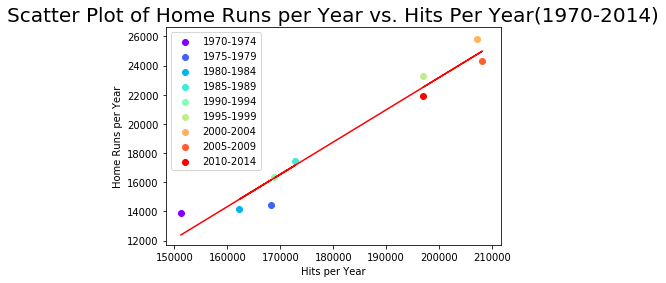

Slope of the regression line: 0.221
Slope: Runs = 0.22*hits + -21087.37
R-Value - Correlation: 0.977


/Users/jacqlyn/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [61]:
#scatter plot for grouped data
# Plot the hits per year and at bats per year as a scatter plot, color-coded by year
colors = {year: color for year, color in zip(year_grouped.index, plt.cm.rainbow(np.linspace(0, 1, len(year_grouped))))}
for index, row in year_grouped.iterrows():
    plt.scatter(row['Hits'], row['Home Runs'], color=colors[index], label=index)

# Add labels to the x and y axis
plt.xlabel("Hits per Year")
plt.ylabel("Home Runs per Year")

x = year_grouped[['Hits']]
y = year_grouped['Home Runs']

#Add title
plt.title('Scatter Plot of Home Runs per Year vs. Hits Per Year(1970-2014)', fontsize=20)

# Fit the linear regression model
reg = LinearRegression().fit(x, y)

plt.plot(x, reg.predict(x), color='red')

# Add a legend to the plot
plt.legend()

# #Save plot - jpeg
# plt.savefig("hits_vs_runs.png", dpi=300)

# Show the plot
plt.show()

# Get the slope of the regression line
slope = reg.coef_[0]
y_int = reg.predict(np.array([0]).reshape(1,-1))
# Print the slope
print("Slope of the regression line:", round(slope,3))
print(f"Slope: Runs = {round(slope,2)}*hits + {round(y_int[0],2)}")
#print the correlation
correlation = year_grouped['Hits'].corr(year_grouped['Home Runs'])
print("R-Value - Correlation:",round(correlation,3))


In [16]:
#Group by years - get the sum of hits, at bats
hits_sum = revised_df.groupby('yearID').sum()['H']
runs_sum = revised_df.groupby('yearID').sum()['R']


In [19]:
baseball_stats = pd.DataFrame({
    'Hits': hits_sum,
    'Runs': runs_sum,
})

baseball_stats = baseball_stats.reset_index()
baseball_stats
# baseball_stats = baseball_stats.rename(columns={
#     'Years': 'yearID',
#     'Hits per year': hits_sum,
#     'At Bats per year': ab_sum,
#     'Batting Average': batting_avg_per_year
# })

baseball_stats.head()

,yearID,Hits,Runs
0,1970,30762.0,15557.0
1,1971,29666.0,13765.0
2,1972,27513.0,12470.0
3,1973,31833.0,15304.0
4,1974,31470.0,14893.0


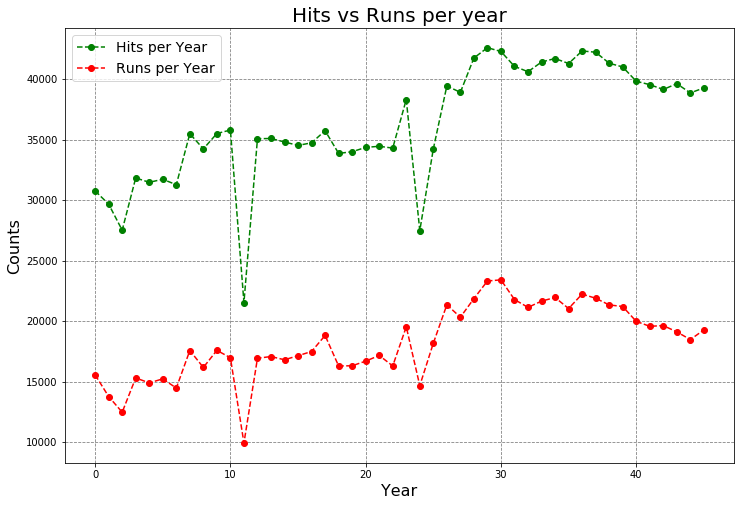

In [66]:
#plot hits and bats over time

plt.figure(figsize=(12,8))
plt.plot(baseball_stats.index, baseball_stats['Hits'], color='green', linestyle='--', marker='o', label='Hits per Year')
plt.plot(baseball_stats.index, baseball_stats['Runs'], color='red', linestyle='--', marker='o', label='Runs per Year')



#Add labels 
plt.xlabel('Year',fontsize=16)
plt.ylabel('Counts',fontsize=16)
plt.title('Hits vs Runs per year', fontsize=20)
plt.legend(loc='best', fontsize=14)

# Add gridlines and set the axis limits
plt.grid(b=True, which='major', color='gray', linestyle='--')



#Show the plot

plt.show()

In [23]:
correlation = baseball_stats['Hits'].corr(baseball_stats['Runs'])
correlation

#A positive correlation coefficient indicates a positive relationship, 
#meaning that as one variable increases, the other variable also increases. 

0.9724761252603942

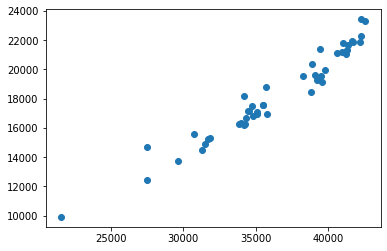

In [24]:
#Plotting hits per year and at bats per year as scatter plot - this hmm doesn't work since there is multiple years
plt.scatter(baseball_stats['Hits'],baseball_stats['Runs'])

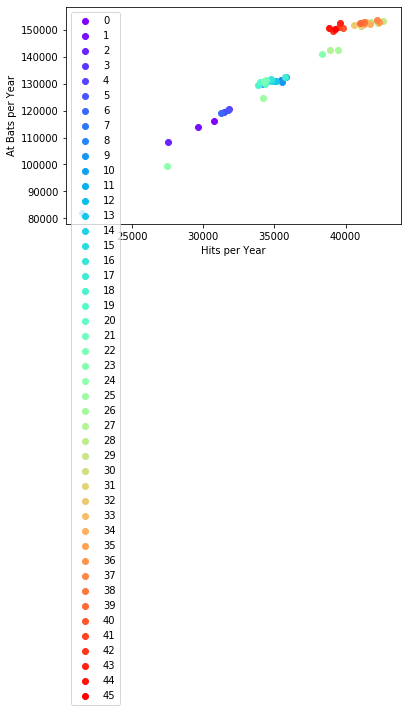